In [ ]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

# Generate images

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
DATA_PATH = Path("../thesis/img/")

<IPython.core.display.Javascript object>

# DTW

In [4]:
from fastdtw import fastdtw

<IPython.core.display.Javascript object>

In [5]:
ts_0 = np.sin(np.logspace(0, np.log10(2 * np.pi), 30))
ts_1 = np.sin(np.linspace(1, 2 * np.pi, 30))

<IPython.core.display.Javascript object>

In [6]:
distance, warping_path = fastdtw(ts_0, ts_1)

<IPython.core.display.Javascript object>

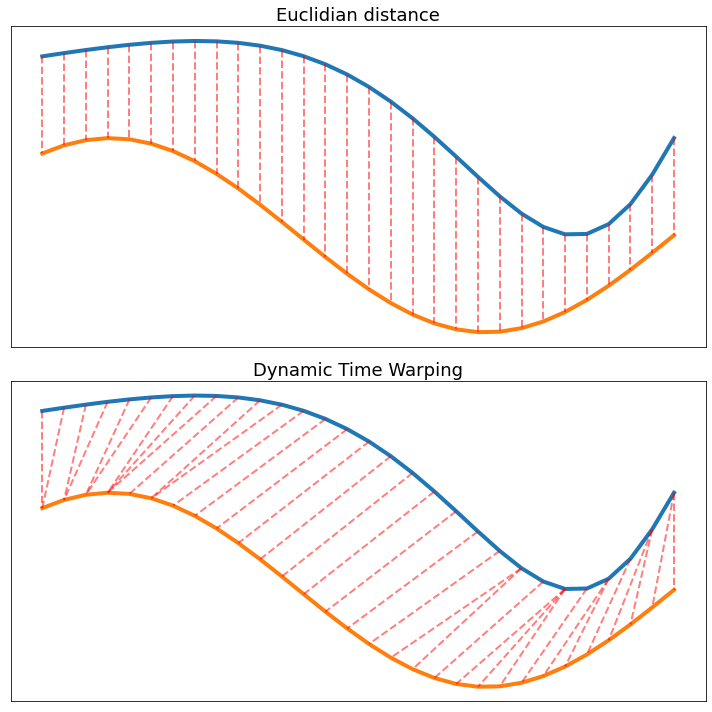

<IPython.core.display.Javascript object>

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for name, ax in zip(["Euclidian distance", "Dynamic Time Warping"], axs):
    ax.plot(ts_0 + 1, linewidth=4)
    ax.plot(ts_1, linewidth=4)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(name, fontsize=18)

for x, y in zip(zip(np.arange(30), np.arange(30)), zip(ts_0 + 1, ts_1)):
    axs[0].plot(x, y, "r--", linewidth=2, alpha=0.5)

for x_0, x_1 in warping_path:
    axs[1].plot([x_0, x_1], [ts_0[x_0] + 1, ts_1[x_1]], "r--", linewidth=2, alpha=0.5)

plt.savefig(DATA_PATH / "dtw_vs_euclid.svg")

plt.tight_layout()
plt.show()

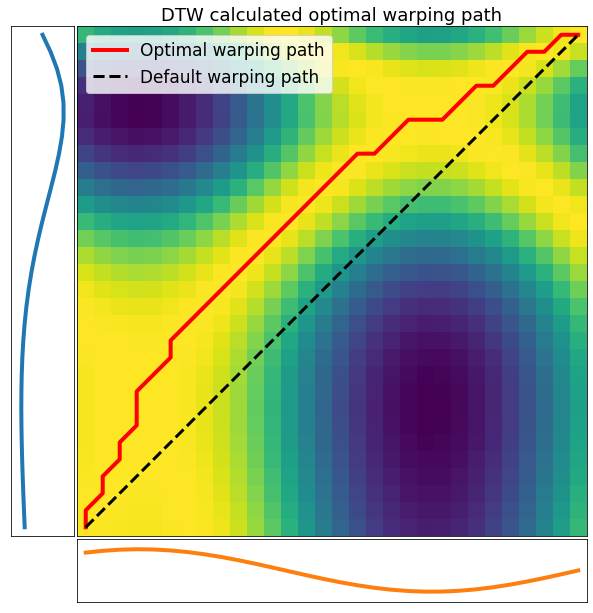

<IPython.core.display.Javascript object>

In [8]:
matrix = (ts_0.reshape(-1, 1) - ts_1) ** 2

x = [x for x, _ in warping_path]
y = [y for _, y in warping_path]

# plt.close('all')
fig = plt.figure(figsize=(10, 10))


gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(1, 8),
    height_ratios=(8, 1),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.01,
    hspace=0.01,
)

fig.tight_layout()

ax_ts_x = fig.add_subplot(gs[0, 0])
ax_ts_y = fig.add_subplot(gs[1, 1])
ax = fig.add_subplot(gs[0, 1], sharex=ax_ts_y, sharey=ax_ts_x)

ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis="x", labelbottom=False)
ax.tick_params(axis="y", labelleft=False)
ax.set_title("DTW calculated optimal warping path", fontsize=18)

im = ax.imshow(np.log1p(matrix), origin="lower", cmap="viridis_r")

ax.plot(y, x, "r", linewidth=4, label="Optimal warping path")
ax.plot(
    [0, 29], [0, 29], "--", linewidth=3, color="black", label="Default warping path"
)
ax.legend(prop={"size": 17})

ax_ts_x.plot(ts_0 * -1, np.arange(30), linewidth=4, color="#1f77b4")
# ax_ts_x.set_yticks(np.arange(30))
ax_ts_x.set_ylim(-0.5, 29.5)
ax_ts_x.set_xlim(-1.5, 1.5)
ax_ts_x.set_xticks([])


ax_ts_y.plot(ts_1, linewidth=4, color="#ff7f0e")
# ax_ts_y.set_xticks(np.arange(30))
ax_ts_y.set_xlim(-0.5, 29.5)
ax_ts_y.set_ylim(-1.5, 1.5)
ax_ts_y.set_yticks([])

plt.savefig(DATA_PATH / "dtw_warping_path.svg")

plt.show()

# TSNE

In [9]:
from sklearn.datasets import make_swiss_roll, make_s_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import mpl_toolkits.mplot3d.axes3d as p3

<IPython.core.display.Javascript object>

In [10]:
n_samples = 1500
X, y = make_swiss_roll(n_samples, noise=0.1)
X, y = make_s_curve(n_samples, random_state=42)

<IPython.core.display.Javascript object>

/home/ondrej/Documents/visual-analysis-of-big-time-series-datasets/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


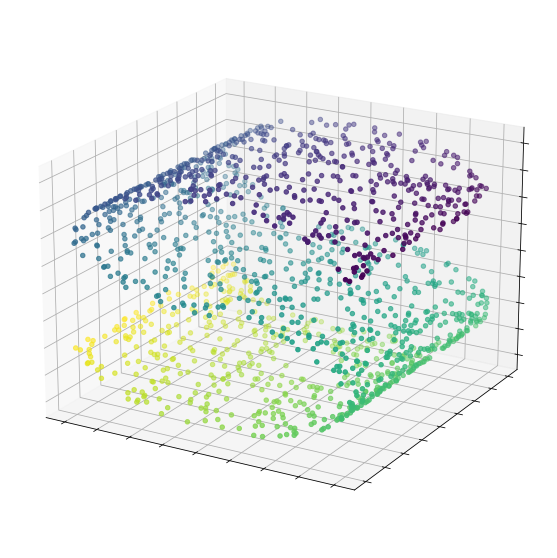

<IPython.core.display.Javascript object>

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection="3d")
ax.view_init(20, -60)
# ax.set_title("S curve dataset", fontsize=18)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
fig.tight_layout()

plt.savefig(DATA_PATH / "s_dataset.svg", bbox_inches=0)

plt.show()

In [12]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, init="pca", random_state=42).fit_transform(
    X
)

<IPython.core.display.Javascript object>

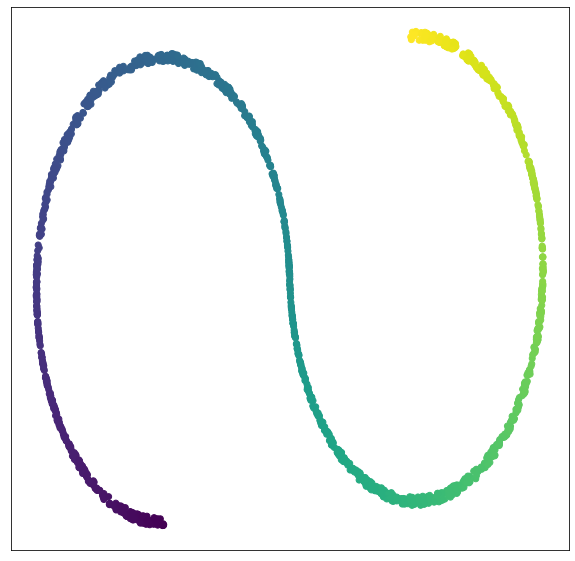

<IPython.core.display.Javascript object>

In [13]:
fig = plt.figure(figsize=(10, 10))

# plt.title("PCA transformation", fontsize=18)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xticks([])
plt.yticks([])

plt.savefig(DATA_PATH / "s_dataset_pca.svg")

plt.show()

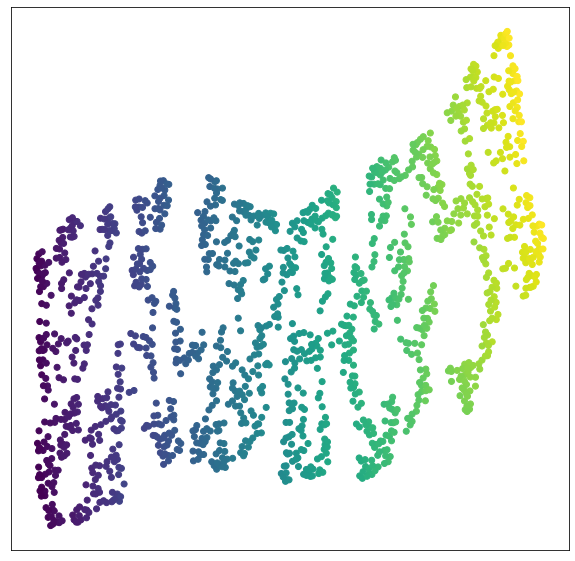

<IPython.core.display.Javascript object>

In [14]:
fig = plt.figure(figsize=(10, 10))

# plt.title("t-SNE transformation", fontsize=18)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

plt.xticks([])
plt.yticks([])


plt.savefig(DATA_PATH / "s_dataset_tsne.svg")


plt.show()

# Datashader

In [15]:
import datashader as ds
import datashader.transfer_functions as tf

from lttb import downsample

import matplotlib.patches as mpatches

<IPython.core.display.Javascript object>

In [16]:
np.random.seed(42)
signal = np.random.normal(0, 10, size=10**6).cumsum() + np.sin(np.linspace(0, 100 * np.pi, 10**6)) * np.random.normal(0, 1, size=10**6)

s_frame = pd.DataFrame(signal, columns=["signal"]).reset_index()

<IPython.core.display.Javascript object>

In [17]:
x = 1500
y = 500

cvs = ds.Canvas(plot_height=y, plot_width=x)
line = cvs.line(s_frame, "index", "signal")

img = tf.shade(line).to_pil()

<IPython.core.display.Javascript object>

In [18]:
trans = downsample(s_frame.values, 100)
trans[:, 0] /= trans[:, 0].max()
trans[:, 0] *= x
trans[:, 1] *= -1
trans[:, 1] -= trans[:, 1].min()
trans[:, 1] /= trans[:, 1].max()
trans[:, 1] *= y

<IPython.core.display.Javascript object>

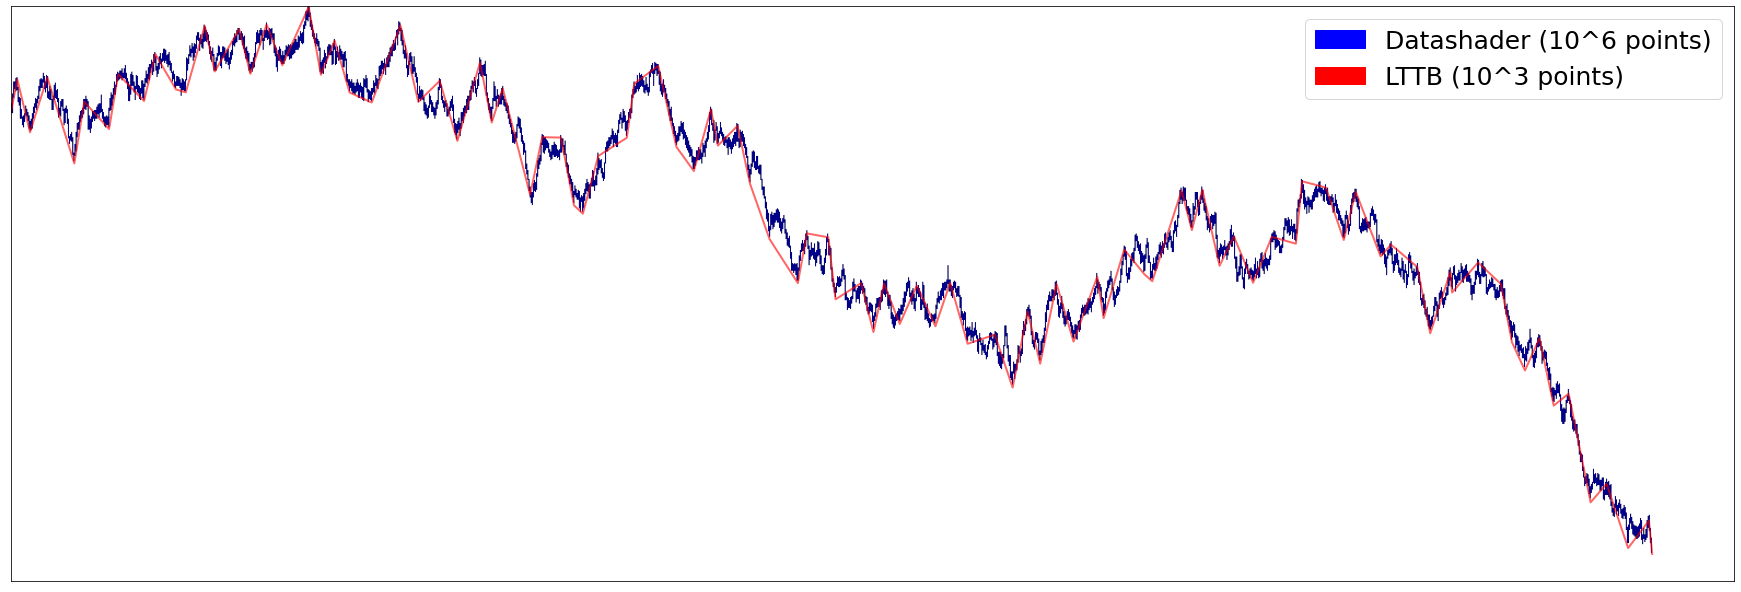

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(x / 60, y / 60))
plt.imshow(img, origin="upper")

plt.plot(*trans.T, "r", alpha=0.6, linewidth=2)
plt.legend(
    handles=[
        mpatches.Patch(color="blue", label="Datashader (10^6 points)"),
        mpatches.Patch(color="red", label="LTTB (10^3 points)"),
    ],
    prop={"size": 25},
)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(DATA_PATH / "datashader.png")

plt.show()

# LTTB

In [20]:
from matplotlib.patches import Polygon
from matplotlib import cm
from matplotlib.colors import Normalize

<IPython.core.display.Javascript object>

In [21]:
np.random.seed(42)
ns = np.random.normal(0, 1, size=26).cumsum()

<IPython.core.display.Javascript object>

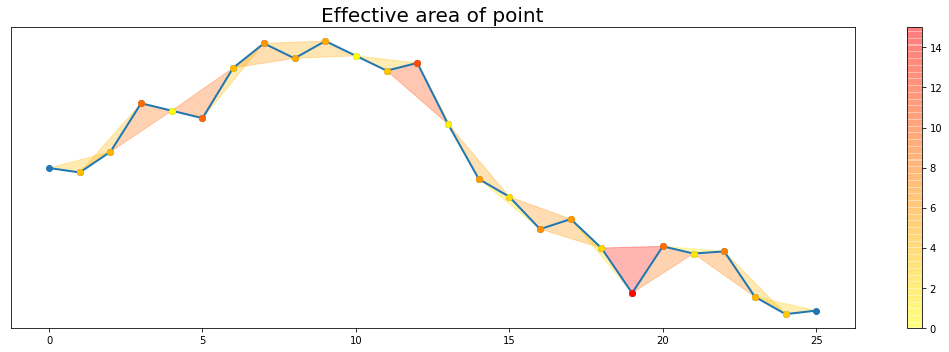

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "-o", linewidth=2)

mapper = cm.ScalarMappable(Normalize(vmin=0, vmax=15, clip=True), cmap="autumn_r")

areas = []

for i, data in enumerate(ns[:-2], 1):

    cors = [[i + ui, ns[i + ui]] for ui in range(-1, 2)]
    x = [m[0] for m in cors]
    y = [m[1] for m in cors]

    ea = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1))) * 10

    areas.append(ea)

    # ax.text(i + 0.1, ns[i], f"{ea:.1f}", fontsize=15)

    color = mapper.to_rgba(ea)  # cm.tab10.colors[i % 5 + 1]

    plt.plot([i], [ns[i]], "o", color=color)

    ax.add_patch(
        Polygon(
            cors,
            closed=True,
            fill=True,
            alpha=0.3,
            color=color,
        )
    )


plt.colorbar(mapper, alpha=0.3)

plt.title("Effective area of point", fontsize=20)
plt.yticks([])

plt.tight_layout()
plt.savefig(DATA_PATH / "effective-area.svg")

plt.show()

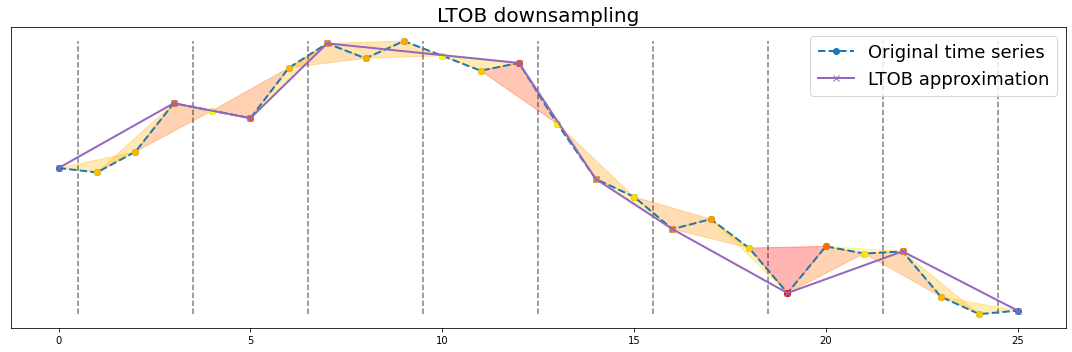

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "--o", linewidth=2, label="Original time series")

mapper = cm.ScalarMappable(Normalize(vmin=0, vmax=15, clip=True), cmap="autumn_r")


lotb = np.concatenate(
    [[0], np.arange(1, 25, 3) + np.array(areas).reshape(-1, 3).argmax(axis=1), [25]]
)

for i, data in enumerate(ns[:-2], 1):

    cors = [[i + ui, ns[i + ui]] for ui in range(-1, 2)]

    x = [m[0] for m in cors]
    y = [m[1] for m in cors]

    ea = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1))) * 10

    color = mapper.to_rgba(ea)  # cm.tab10.colors[i % 5 + 1]

    plt.plot([i], [ns[i]], "o", color=color)

    ax.add_patch(
        Polygon(
            cors,
            closed=True,
            fill=True,
            alpha=0.3,
            color=color,
        )
    )

plt.plot(
    lotb, ns[lotb], "-x", linewidth=2, color="tab:purple", label="LTOB approximation"
)

# plt.colorbar(mapper, alpha=0.3)

plt.vlines(np.linspace(0.5, 24.5, 9), ns.min(), ns.max(), "black", "--", alpha=0.5)
plt.yticks([])

plt.title("LTOB downsampling", fontsize=20)
plt.legend(prop={"size": 18})
plt.tight_layout()


plt.savefig(DATA_PATH / "ltob.svg")
plt.show()

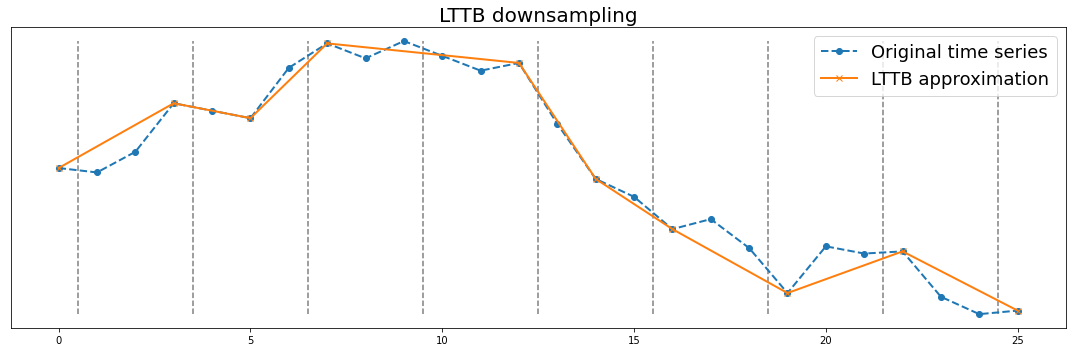

<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.plot(ns, "--o", linewidth=2, label="Original time series")

ds = downsample(np.vstack([np.arange(26), ns]).T, 10)


plt.plot(*ds.T, "-x", linewidth=2, label="LTTB approximation")
# plt.plot(ns, "x")

plt.vlines(np.linspace(0.5, 24.5, 9), ns.min(), ns.max(), "black", "--", alpha=0.5)
plt.yticks([])

plt.title("LTTB downsampling", fontsize=20)
plt.legend(prop={"size": 18})
plt.tight_layout()

plt.savefig(DATA_PATH / "lttb.svg")
plt.show()